In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import os
import sys

In [2]:
import scanpy as sc

# read the full GSE dataset
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/batch_corrected/Hao_PBMC_Harmony_unscaled.h5ad')
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Batch_corrected\Hao_PBMC_Harmony_unscaled.h5ad")
adata.shape

(161764, 33538)

In [3]:
adata.obs['celltype.l2'] = adata.obs['celltype.l2'].str.replace(' ', '_')

label = adata.obs['celltype.l2'].tolist()
types = np.unique(label).tolist()
print(types)

['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']


In [15]:
likelihood_df = pd.read_csv('L2_likelihood_df.csv', index_col=0)
likelihood_df.index = adata.obs_names
likelihood_df.head()

ASDC  B_intermediate      B_memory       B_naive  \
L1_AAACCCAAGAAACTCA  1.343484e-05        0.000010  1.378923e-05  1.151111e-05   
L1_AAACCCAAGACATACA  4.854250e-08        0.000087  1.054397e-04  9.325639e-06   
L1_AAACCCACAACTGGTT  1.773020e-07        0.000072  8.910484e-06  4.521020e-06   
L1_AAACCCACACGTACTA  8.567967e-08        0.000028  4.906752e-07  1.132355e-06   
L1_AAACCCACAGCATACT  2.908055e-08        0.000113  5.180162e-05  9.821320e-07   

                        CD14_Mono  CD16_Mono       CD4_CTL     CD4_Naive  \
L1_AAACCCAAGAAACTCA  9.763964e-01   0.001859  1.130727e-06  2.295751e-08   
L1_AAACCCAAGACATACA  7.665299e-07   0.000006  6.255603e-06  1.604691e-02   
L1_AAACCCACAACTGGTT  2.655943e-08   0.000008  8.831190e-06  2.548628e-02   
L1_AAACCCACACGTACTA  2.705006e-06   0.000309  6.376855e-07  1.524314e-06   
L1_AAACCCACAGCATACT  7.962159e-08   0.000121  1.586302e-06  1.789914e-03   

                     CD4_Proliferating       CD4_TCM  ...  NK_CD56bright  \
L1_AAACCCAAGAAACTCA       2.162827e-05  3.968692e-04  ...   1.648412e-07   
L1_AAACCCAAGACATACA       2.041783e-04  9.539641e-01  ...   2.280035e-04   
L1_AAACCCACAACTGGTT       8.948075e-07  3.341922e-04  ...   2.835597e-05   
L1_AAACCCACACGTACTA       7.453669e-09  8.451199e-07  ...   1.051962e-05   
L1_AAACCCACAGCATACT       1.047226e-06  4.407222e-04  ...   3.184529e-05   

                     NK_Proliferating  Plasmablast  Platelet          Treg  \
L1_AAACCCAAGAAACTCA      6.424289e-06     0.000013  0.000659  1.370129e-07   
L1_AAACCCAAGACATACA      3.321969e-07     0.000002  0.000315  1.118387e-04   
L1_AAACCCACAACTGGTT      3.916500e-07     0.000002  0.000247  3.298359e-03   
L1_AAACCCACACGTACTA      7.185731e-05     0.000007  0.000310  2.045567e-07   
L1_AAACCCACAGCATACT      1.603735e-07     0.000005  0.000317  1.946429e-04   

                             cDC1          cDC2       dnT           gdT  \
L1_AAACCCAAGAAACTCA  1.327704e-07  8.384308e-05  0.000005  3.967243e-07   
L1_AAACCCAAGACATACA  2.436826e-07  7.612749e-09  0.000181  8.094163e-04   
L1_AAACCCACAACTGGTT  3.605246e-07  3.587770e-08  0.000962  4.418641e-03   
L1_AAACCCACACGTACTA  1.080857e-06  5.625754e-09  0.000002  2.664005e-02   
L1_AAACCCACAGCATACT  1.968709e-07  2.089452e-08  0.000305  2.711808e-03   

                              pDC  
L1_AAACCCAAGAAACTCA  1.809806e-07  
L1_AAACCCAAGACATACA  5.470405e-07  
L1_AAACCCACAACTGGTT  7.836229e-07  
L1_AAACCCACACGTACTA  3.931551e-05  
L1_AAACCCACAGCATACT  2.485593e-07  

[5 rows x 31 columns]

In [16]:
likelihood_df.shape

(161764, 31)

In [17]:
adata.obs.head()

celltype.l1 celltype.l2 celltype.l3   Batch donor  time  \
L1_AAACCCAAGAAACTCA        Mono   CD14_Mono   CD14 Mono  Batch1    P2     7   
L1_AAACCCAAGACATACA       CD4 T     CD4_TCM   CD4 TCM_1  Batch1    P1     7   
L1_AAACCCACAACTGGTT       CD8 T   CD8_Naive   CD8 Naive  Batch1    P4     2   
L1_AAACCCACACGTACTA          NK          NK        NK_2  Batch1    P3     7   
L1_AAACCCACAGCATACT       CD8 T   CD8_Naive   CD8 Naive  Batch1    P4     7   

                    lane Phase  nCount_ADT  nFeature_ADT  nCount_RNA  \
L1_AAACCCAAGAAACTCA   L1    G1        7535           217       10823   
L1_AAACCCAAGACATACA   L1    G1        6013           209        5864   
L1_AAACCCACAACTGGTT   L1     S        6620           213        5067   
L1_AAACCCACACGTACTA   L1    G1        3567           202        4786   
L1_AAACCCACAGCATACT   L1    G1        6402           215        6505   

                     nFeature_RNA leiden  
L1_AAACCCAAGAAACTCA          2915      4  
L1_AAACCCAAGACATACA          1617      2  
L1_AAACCCACAACTGGTT          1381      5  
L1_AAACCCACACGTACTA          1890      3  
L1_AAACCCACAGCATACT          1621      5

In [20]:
# Concatenate the likelihood_df with the adata.obs
adata.obs = pd.concat([adata.obs, likelihood_df], axis=1)
adata.obs.head()

celltype.l1 celltype.l2 celltype.l3   Batch donor  time  \
L1_AAACCCAAGAAACTCA        Mono   CD14_Mono   CD14 Mono  Batch1    P2     7   
L1_AAACCCAAGACATACA       CD4 T     CD4_TCM   CD4 TCM_1  Batch1    P1     7   
L1_AAACCCACAACTGGTT       CD8 T   CD8_Naive   CD8 Naive  Batch1    P4     2   
L1_AAACCCACACGTACTA          NK          NK        NK_2  Batch1    P3     7   
L1_AAACCCACAGCATACT       CD8 T   CD8_Naive   CD8 Naive  Batch1    P4     7   

                    lane Phase  nCount_ADT  nFeature_ADT  ...  NK_CD56bright  \
L1_AAACCCAAGAAACTCA   L1    G1        7535           217  ...   1.648412e-07   
L1_AAACCCAAGACATACA   L1    G1        6013           209  ...   2.280035e-04   
L1_AAACCCACAACTGGTT   L1     S        6620           213  ...   2.835597e-05   
L1_AAACCCACACGTACTA   L1    G1        3567           202  ...   1.051962e-05   
L1_AAACCCACAGCATACT   L1    G1        6402           215  ...   3.184529e-05   

                     NK_Proliferating Plasmablast  Platelet          Treg  \
L1_AAACCCAAGAAACTCA      6.424289e-06    0.000013  0.000659  1.370129e-07   
L1_AAACCCAAGACATACA      3.321969e-07    0.000002  0.000315  1.118387e-04   
L1_AAACCCACAACTGGTT      3.916500e-07    0.000002  0.000247  3.298359e-03   
L1_AAACCCACACGTACTA      7.185731e-05    0.000007  0.000310  2.045567e-07   
L1_AAACCCACAGCATACT      1.603735e-07    0.000005  0.000317  1.946429e-04   

                             cDC1          cDC2       dnT           gdT  \
L1_AAACCCAAGAAACTCA  1.327704e-07  8.384308e-05  0.000005  3.967243e-07   
L1_AAACCCAAGACATACA  2.436826e-07  7.612749e-09  0.000181  8.094163e-04   
L1_AAACCCACAACTGGTT  3.605246e-07  3.587770e-08  0.000962  4.418641e-03   
L1_AAACCCACACGTACTA  1.080857e-06  5.625754e-09  0.000002  2.664005e-02   
L1_AAACCCACAGCATACT  1.968709e-07  2.089452e-08  0.000305  2.711808e-03   

                              pDC  
L1_AAACCCAAGAAACTCA  1.809806e-07  
L1_AAACCCAAGACATACA  5.470405e-07  
L1_AAACCCACAACTGGTT  7.836229e-07  
L1_AAACCCACACGTACTA  3.931551e-05  
L1_AAACCCACAGCATACT  2.485593e-07  

[5 rows x 44 columns]

## UMAP

In [21]:
types

['ASDC',
 'B_intermediate',
 'B_memory',
 'B_naive',
 'CD14_Mono',
 'CD16_Mono',
 'CD4_CTL',
 'CD4_Naive',
 'CD4_Proliferating',
 'CD4_TCM',
 'CD4_TEM',
 'CD8_Naive',
 'CD8_Proliferating',
 'CD8_TCM',
 'CD8_TEM',
 'Doublet',
 'Eryth',
 'HSPC',
 'ILC',
 'MAIT',
 'NK',
 'NK_CD56bright',
 'NK_Proliferating',
 'Plasmablast',
 'Platelet',
 'Treg',
 'cDC1',
 'cDC2',
 'dnT',
 'gdT',
 'pDC']

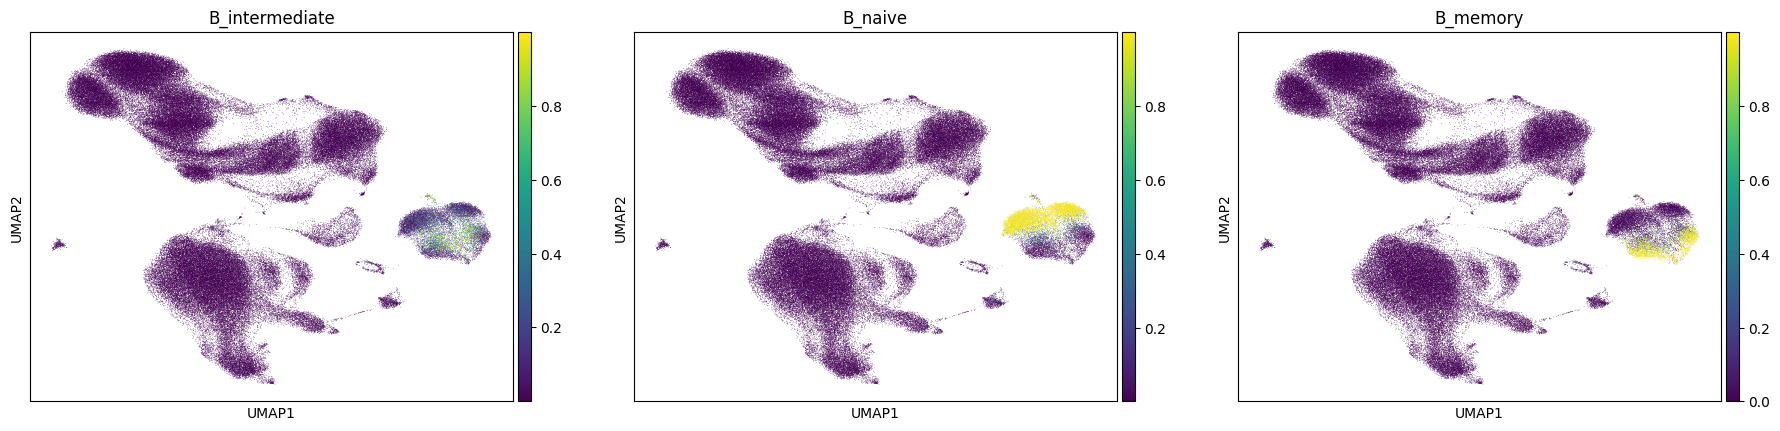

In [25]:
# B cells
sc.pl.umap(adata, color=['B_intermediate', 'B_naive', 'B_memory'])

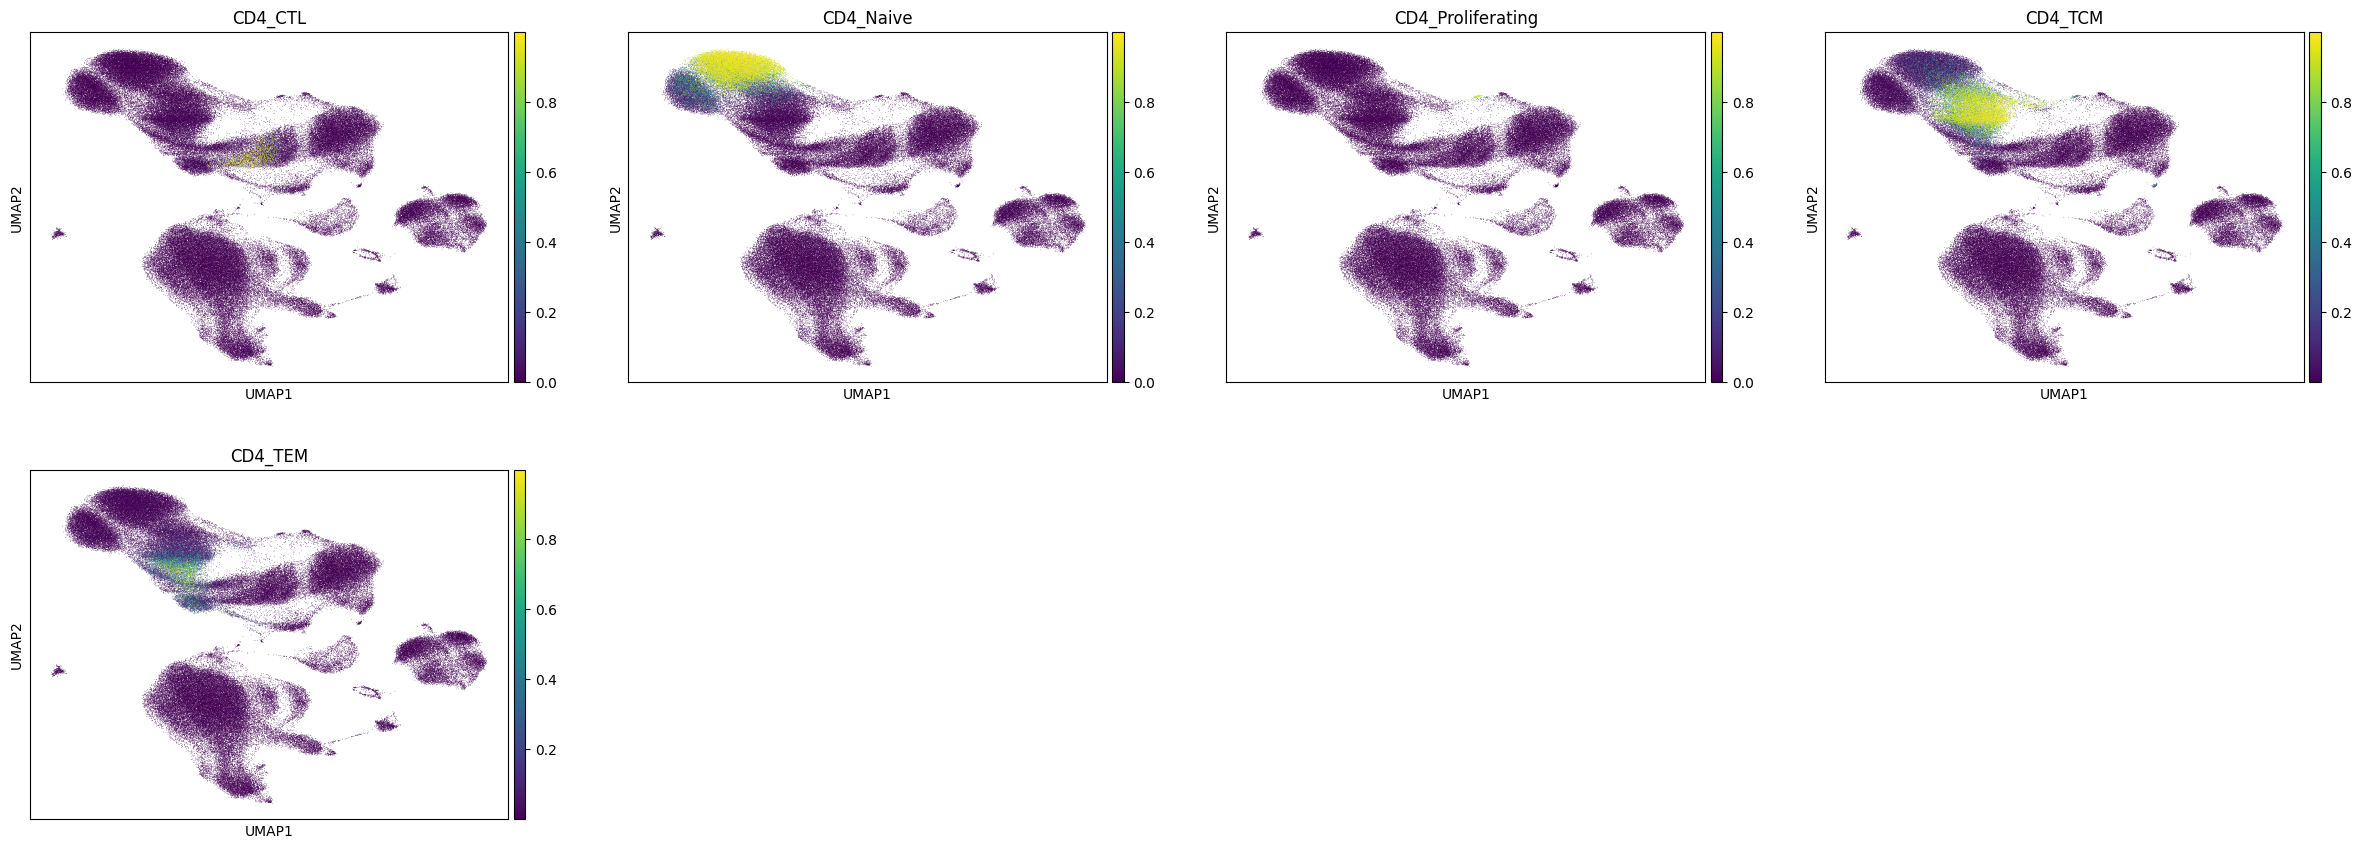

In [26]:
# CD4 T cells
sc.pl.umap(adata, color=['CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM'])

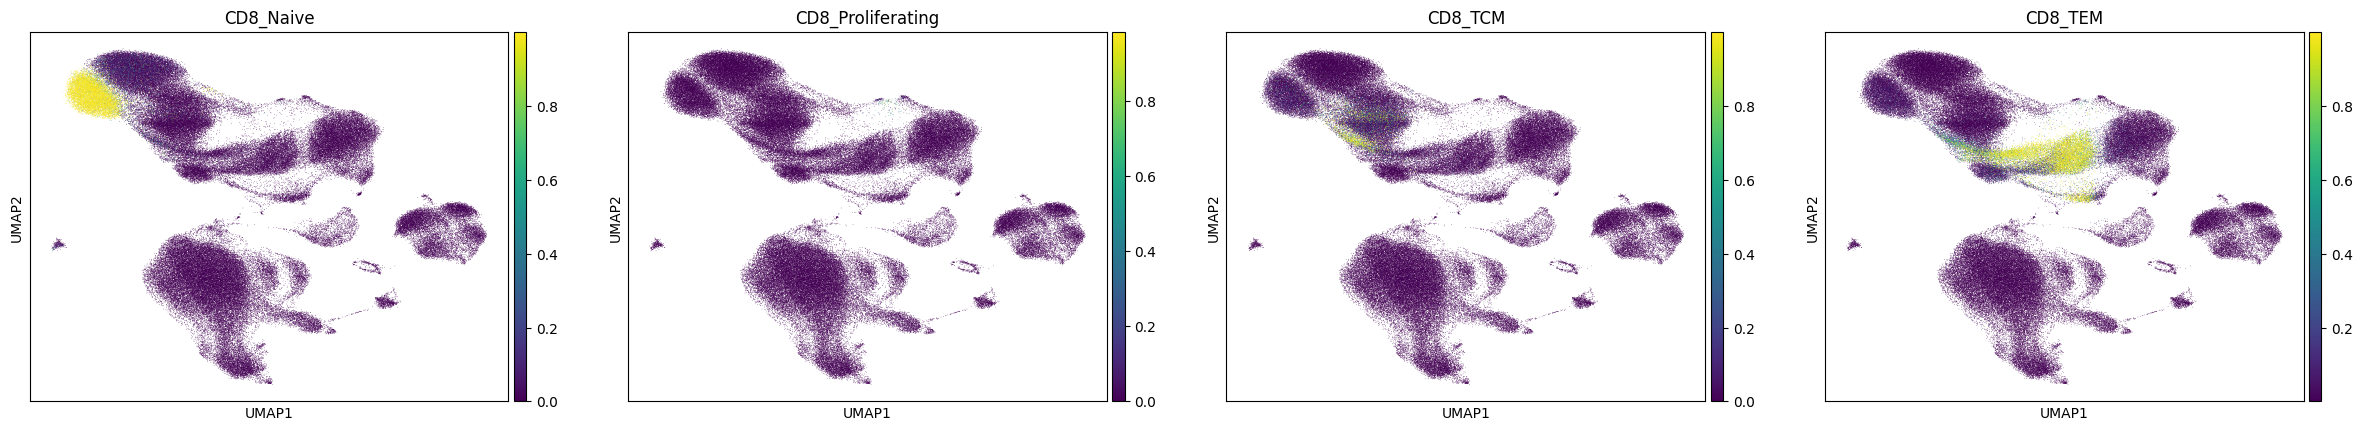

In [27]:
# CD8 T cells
sc.pl.umap(adata, color=['CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM'])

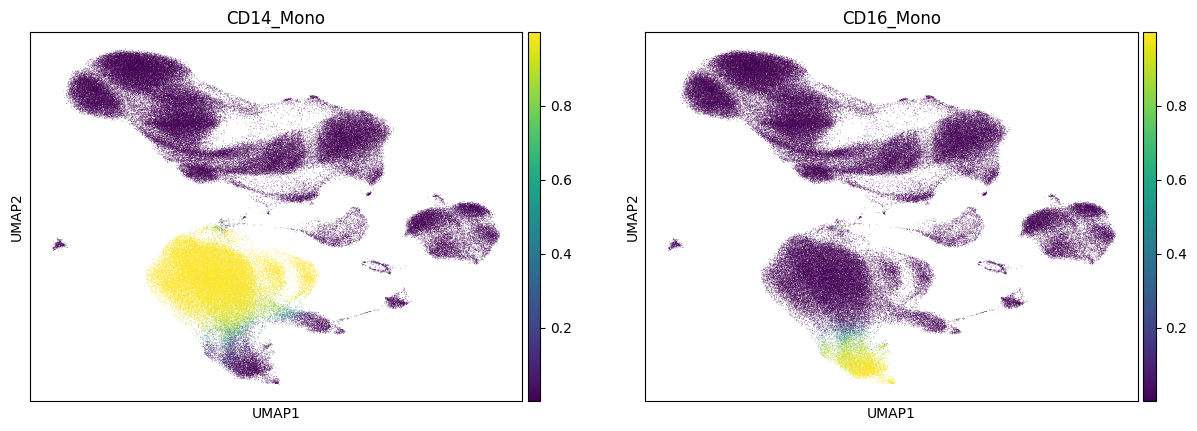

In [28]:
# Monocytes
sc.pl.umap(adata, color=['CD14_Mono', 'CD16_Mono'])

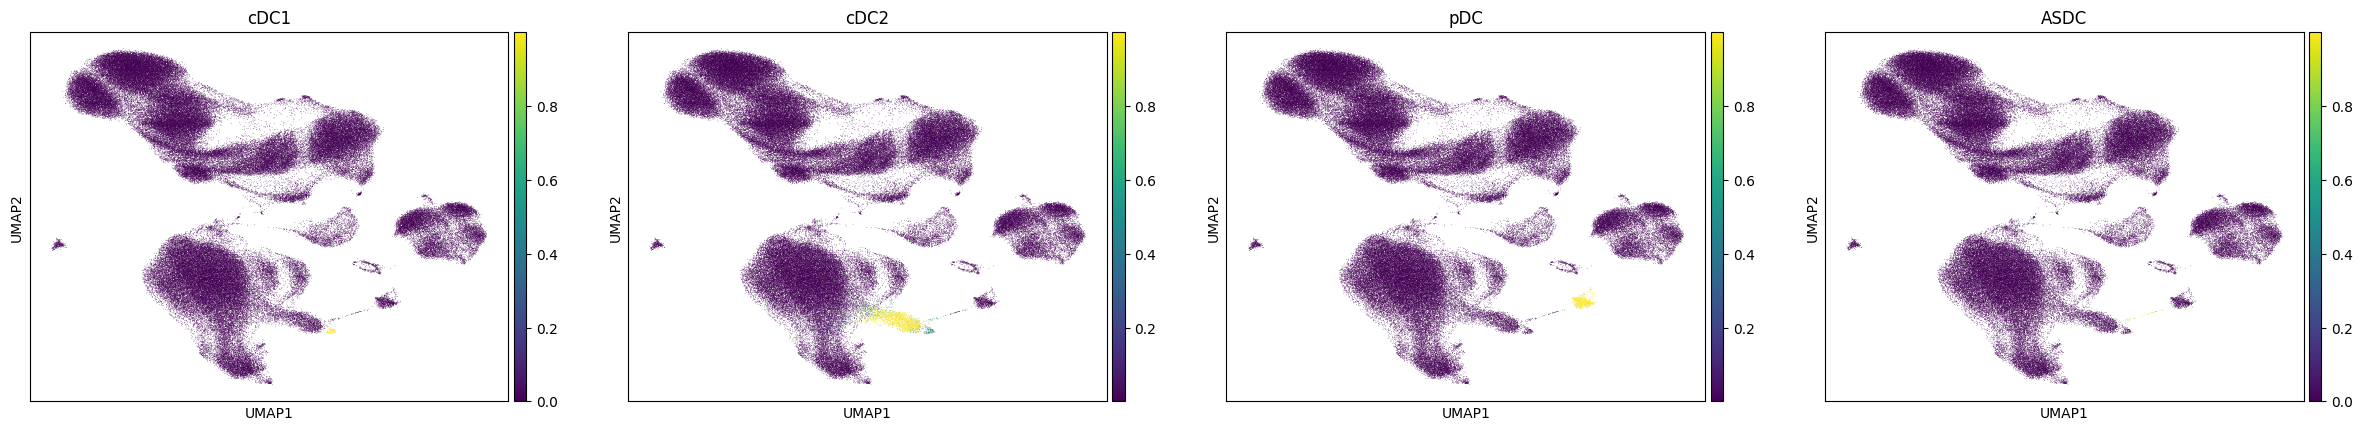

In [29]:
# Dentritic cells
sc.pl.umap(adata, color=['cDC1', 'cDC2', 'pDC', 'ASDC'])

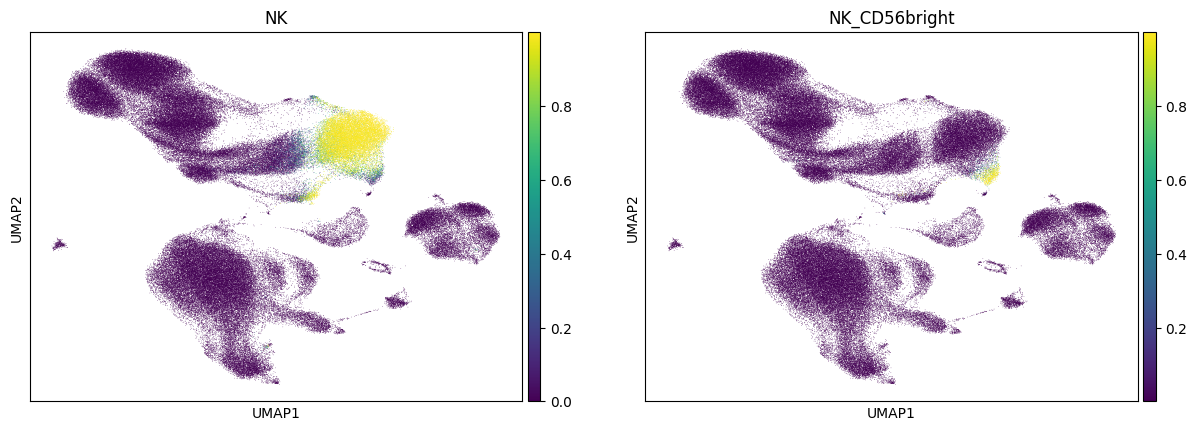

In [30]:
# NK cells
sc.pl.umap(adata, color=['NK', 'NK_CD56bright'])

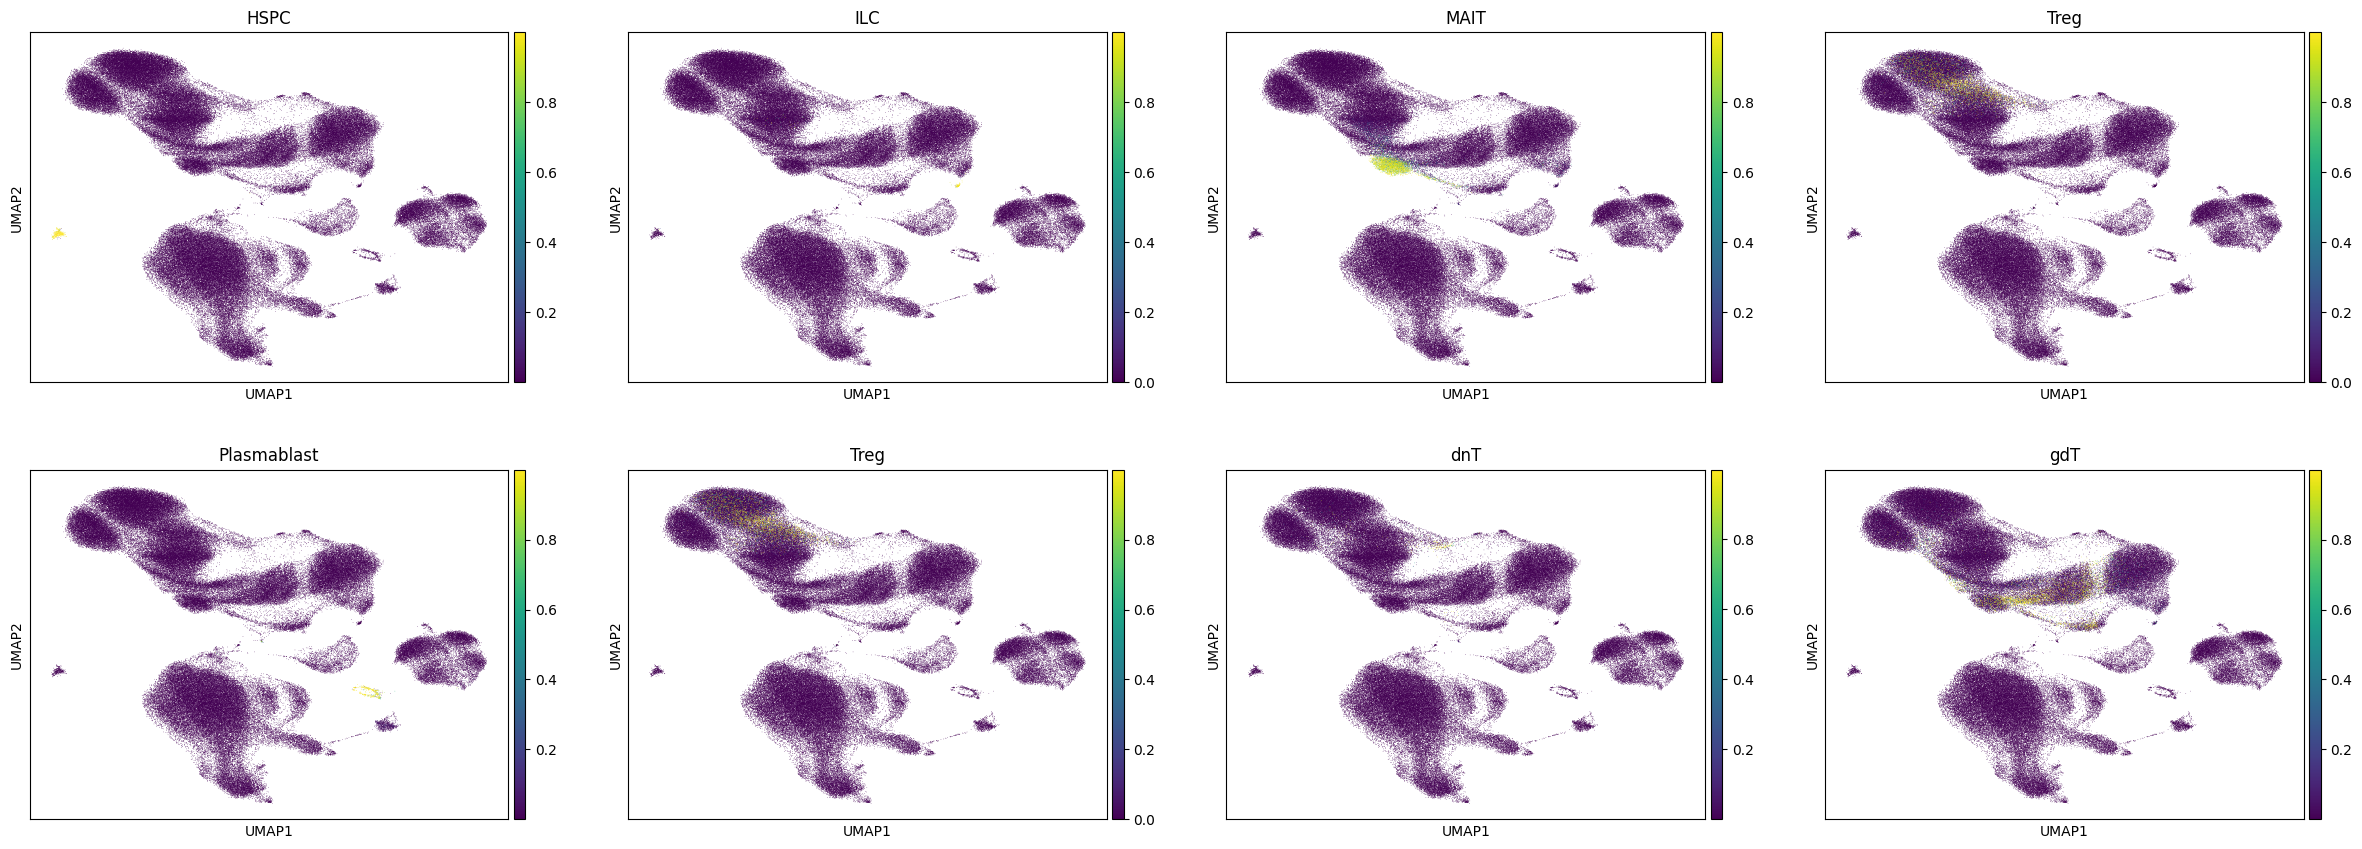

In [31]:
# Other small cell types
sc.pl.umap(adata, color=['HSPC', 'ILC', 'MAIT', 'Treg', 'Plasmablast', 'Treg', 'dnT', 'gdT'])